<a href="https://colab.research.google.com/github/AyraCaps/Dsa-arya/blob/main/ARYA_P_Case_study2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Case Study on Regression***

**Case study problem**

*The given dataset contains price of second-hand Hyundai grand i10 car with respect to year of making.*

*   Find the best linear relationship between year and price.
*  Predict the possible price of a 2022 model second-hand grand i10

* Learn about lasso regression and create a model along with linear regression. Find out which one is performing better.



**Performing case study**

In [2]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns

In [3]:
# Loading the dataset
data=pd.read_csv('/content/car_age_price.csv')
data.head() # first few rows of the dataset

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
# get some basic information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
#statistical summary
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [6]:
# data types
data.dtypes

Year     int64
Price    int64
dtype: object

In [7]:
# checking missing values
data.isna().sum()


Year     0
Price    0
dtype: int64

the dataset dosen't have any null values

In [8]:
data['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014])

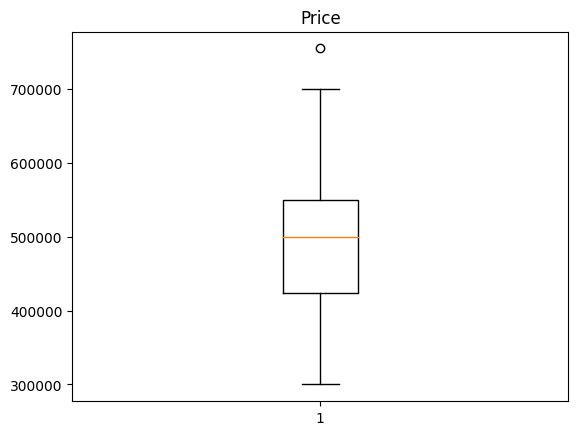

In [9]:
# finding ouliers in price coulmn
plt.boxplot(data['Price'])  # BOXPLOT
plt.title('Price');

**correlation**

<Axes: >

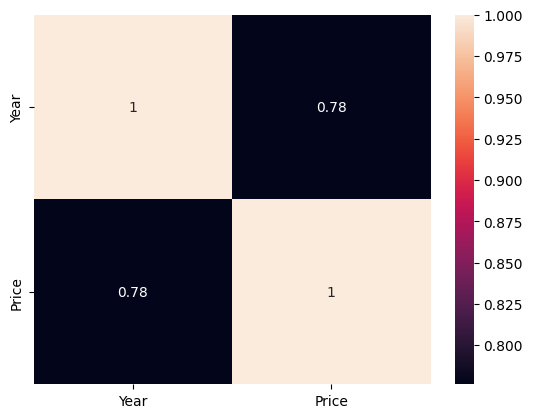

In [10]:
#correlation between year and price
#heatmap
sns.heatmap(data.corr(),annot=True)

**Splitting the dataset**

In [11]:
X=data.drop(['Price'],axis=1)
Y=data['Price']


Split the dataset into train and test set with the first 80% of the data for training and the remaining 20% for testing.

In [12]:
# split the tip data into test and train data
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=3,test_size=.2)


In [13]:
x_test

,Year
99,2020
104,2014
6,2016
5,2015
40,2019
89,2017
23,2017
34,2017
83,2017
42,2018


**Linear regression Model**

> we fit a regression model on the training set to predict  the possible price of a 2022 model second-hand grand i10



In [14]:
from sklearn import linear_model
lin_reg=linear_model.LinearRegression()

In [15]:
# fit a linear regression  on the training data
lin_model=lin_reg.fit(x_train,y_train)

In [16]:
# use this model to predict the test data
lin_pred=lin_model.predict(x_test)
lin_pred

array([629754.32598735, 366840.53120229, 454478.4627973 , 410659.4969998 ,
       585935.36018984, 498297.42859481, 498297.42859481, 498297.42859481,
       498297.42859481, 542116.39439233, 498297.42859481, 410659.4969998 ,
       323021.56540477, 498297.42859481, 498297.42859481, 542116.39439233,
       498297.42859481, 629754.32598735, 323021.56540477, 498297.42859481,
       323021.56540477, 498297.42859481, 410659.4969998 ])

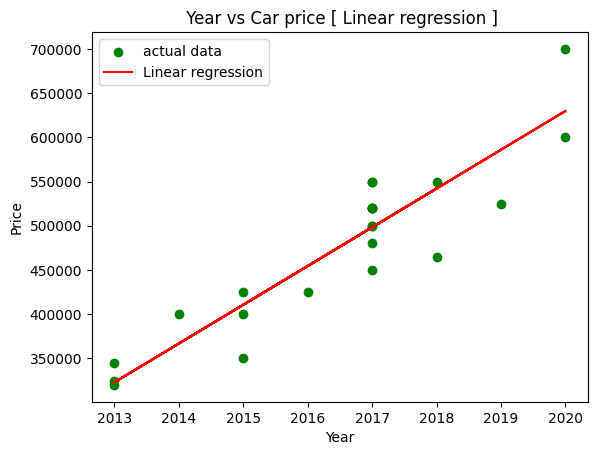

In [17]:
#visualization on test set
plt.scatter(x_test,y_test,color='Green',label='actual data')
plt.plot(x_test,lin_pred,color='Red',label= 'Linear regression')
plt.title(' Year vs Car price [ Linear regression ]')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()


In [18]:
#calculate the test r square value
from sklearn.metrics import  r2_score
print('R squared test set is: ',round(r2_score(y_test,lin_pred),4))

R squared test set is:  0.833


In [35]:
#  predict the price of a 2022 model second-hand grand i10 using this linear regression model
new_data=pd.DataFrame({'Year':[2022]})
predict_price=lin_model.predict(new_data)
predict_price
print('the possible price of a 2022 model second-hand grand i10 = ',predict_price  )

the possible price of a 2022 model second-hand grand i10 =  [717392.25758238]


**LASSO REGRESSION**


> Lasso regression relies upon the linear regression model but additionaly performs a so called L1 regularization, which is a process of introducing additional information in order to prevent overfitting. As a consequence, we can fit a model containing all possible predictors and use lasso to perform variable selection by using a technique that regularizes the coefficient estimates (it shrinks the coefficient estimates towards zero).






In [ ]:
#LASSO REGRESSION

In [20]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso()

In [21]:
# fit a lasso regression  on the training data
lasso_model=lasso_reg.fit(x_train,y_train)

In [22]:
# use this model to predict the test data
lasso_pred=lasso_model.predict(x_test)
lasso_pred

array([629752.90835698, 366841.70608772, 454478.7735108 , 410660.23979926,
       585934.37464543, 498297.30722235, 498297.30722235, 498297.30722235,
       498297.30722235, 542115.84093389, 498297.30722235, 410660.23979926,
       323023.17237617, 498297.30722235, 498297.30722235, 542115.84093389,
       498297.30722235, 629752.90835698, 323023.17237617, 498297.30722235,
       323023.17237617, 498297.30722235, 410660.23979926])

In [23]:
print('R squared test set ',r2_score(y_test,lasso_pred))

R squared test set  0.8329509142988021


*Lasso with optimal alpha*

> To find the optimal value of alpha, we use scikit learns lasso linear model with iterative fitting along a regularization path (LassoCV). The best model is selected by cross-validation.



In [24]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
lasso_optim = LassoCV(cv=5, random_state=42, max_iter=10000)

# Fit model
lasso_optim.fit(x_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=42)

In [25]:
lasso_optim.alpha_

2184.868442263816

In [26]:
#Use best value for our final model:
# Set best alpha
LassoBest_model = Lasso(alpha=lasso_optim.alpha_)
LassoBest_model.fit(x_train, y_train)

Lasso(alpha=2184.868442263816)

In [27]:
lasso_best_pred=LassoBest_model.predict(x_test)
lasso_best_pred

array([626656.99012233, 369407.50133699, 455157.33093211, 412282.41613455,
       583782.07532477, 498032.24572966, 498032.24572966, 498032.24572966,
       498032.24572966, 540907.16052721, 498032.24572966, 412282.41613455,
       326532.58653943, 498032.24572966, 498032.24572966, 540907.16052721,
       498032.24572966, 626656.99012233, 326532.58653943, 498032.24572966,
       326532.58653943, 498032.24572966, 412282.41613455])

In [28]:
# Model evaluation
print('R squared test set is: ',round(r2_score(y_test,lasso_best_pred),3))

R squared test set is:  0.834


prediction

In [29]:
new_data=pd.DataFrame({'Year':[2022]})

In [30]:
#  predict the price of a 2022 model second-hand grand i10 using this lasso regression model with best value of alpha
predict_price=LassoBest_model.predict(new_data)
predict_price
print('the possible price of a 2022 model second-hand grand i10 = ',predict_price)

the possible price of a 2022 model second-hand grand i10 =  [712406.81971745]


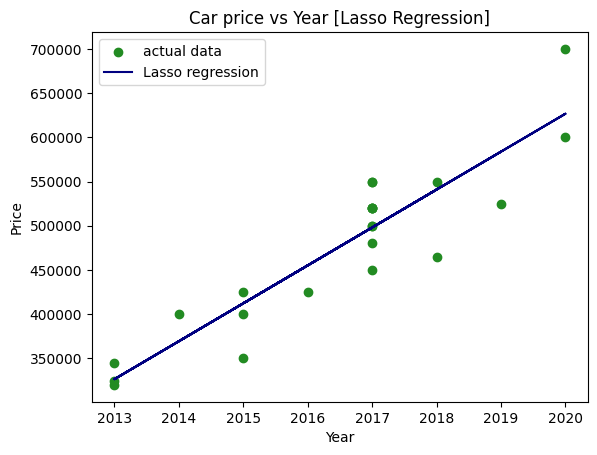

In [31]:
plt.scatter(x_test,y_test,color='forestgreen',label='actual data')
plt.plot(x_test,lasso_best_pred,color='navy',label= 'Lasso regression')

plt.title('Car price vs Year [Lasso Regression]')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

**Comparison - Lasso Regression and Linear Regression**

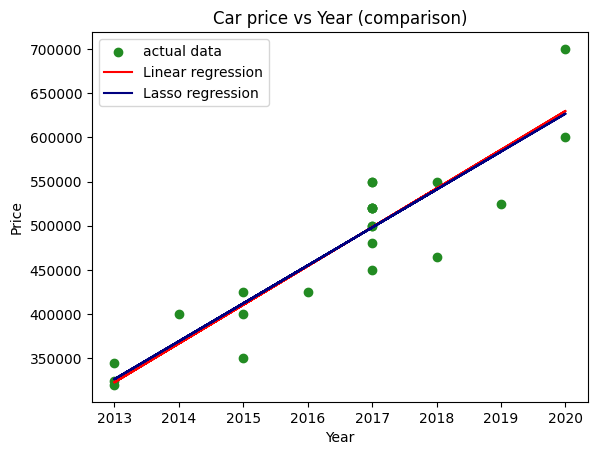

In [49]:
#visualization on test set
plt.scatter(x_test,y_test,color='forestgreen',label='actual data')
plt.plot(x_test,lin_pred,color='red',label= 'Linear regression')
plt.plot(x_test,lasso_best_pred,color='navy',label= 'Lasso regression')

plt.title('Car price vs Year (comparison)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

In [41]:
# R SQUARED SCORE - lasso and linear regression
print('Lasso Regression (with optimum alpha) \n  R squared test set is: ',round(r2_score(y_test,lasso_best_pred),3))
print('  _____________________________ \n Linear Regression  \n  R squared test set is: ',round(r2_score(y_test,lin_pred),4))

Lasso Regression (with optimum alpha) 
  R squared test set is:  0.834
  _____________________________ 
 Linear Regression  
  R squared test set is:  0.833


In [54]:
# Predicted price of a 2022 model second-hand grand i10
print ('Possible price of a 2022 model second-hand grand i10  \n     ---------------------------------------')
print (' Lasso Regression \n predicted price = 712406.8 ',
 ' \n   ______________________ \n Linear Regression \n predicted price = 717392.2')

Possible price of a 2022 model second-hand grand i10  
     ---------------------------------------
 Lasso Regression 
 predicted price = 712406.8   
   ______________________ 
 Linear Regression 
 predicted price = 717392.2


**Case study - Conclusions**


* There is a linear relationship between  price and year of making of second-hand grand i10  car.

*   Here both Linear regression model and lasso regression model are performing almost similar.
*   But we can say that Lasso regression model ( with optimum alpha ) is performing better comparetively. Because its R squred value is slightly greater than that of
 linear regression model.
*    The possible price of a 2022 model second-hand grand i10 car ,

 Lasso Regression :
 predicted price = 712406.8   
   
 Linear Regression :
 predicted price = 717392.2


